In [1]:
import pathlib
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import seaborn as sns
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Set constants
adult_threshold = 18
liquid_tumors = ["Leukemia", "Lymphoma"]

In [3]:
# Set i/o paths and files
data_dir = pathlib.Path("../0.data-download/data")
fig_dir = pathlib.Path("figures")
fig_dir.mkdir(exist_ok=True)

model_input_file = pathlib.Path(f"{data_dir}/Model.csv")
crispr_input_file = pathlib.Path(f"{data_dir}/CRISPRGeneDependency.csv")

cancer_type_output_figure = pathlib.Path(f"{fig_dir}/sample_cancer_types_bar_chart.png")
age_category_output_figure = pathlib.Path(f"{fig_dir}/age_categories_bar_chart.png")
age_distribution_output_figure = pathlib.Path(
    f"{fig_dir}/sample_age_distribution_plot.png"
)
sex_output_figure = pathlib.Path(f"{fig_dir}/sample_gender_bar_chart.png")
pediatric_cancer_type_output_figure = pathlib.Path(
    f"{fig_dir}/pediatric_sample_cancer_types_bar_chart.png"
)
adult_cancer_type_output_figure = pathlib.Path(
    f"{fig_dir}/adult_sample_cancer_types_bar_chart.png"
)

In [4]:
# Load model data
model_df = pd.read_csv(model_input_file)

print(model_df.shape)
model_df.head(3)

(1864, 30)


,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adult,...,NaN,2201.0,NaN,NaN,MF-001-041,None,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000002,PT-5qa3uk,HL-60,HL60,36.0,Commercial,SIDM00829,CVCL_0002,AML,Adult,...,NaN,55.0,NaN,NaN,MF-005-001,None,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000003,PT-puKIyc,CACO2,CACO2,72.0,Commercial,SIDM00891,CVCL_0025,COAD,Adult,...,NaN,NaN,NaN,Unknown,MF-015-009,None,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel


In [5]:
# Load dependency data
gene_dependency_df = pd.read_csv(crispr_input_file)

print(gene_dependency_df.shape)
gene_dependency_df.head(3)

(1095, 17932)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,0.055321,0.014039,0.014084,0.033828,0.049511,0.004955,0.026993,0.131006,0.003102,...,0.047757,0.047806,0.007155,0.002537,0.003660,0.154849,0.015792,0.015999,0.006200,0.436777
1,ACH-000004,0.023418,0.048724,0.058084,0.019483,0.049793,0.064472,0.001775,0.071289,0.003732,...,0.044517,0.471009,0.005096,0.015149,0.009804,0.015507,0.319598,0.007778,0.004392,0.048136
2,ACH-000005,0.059552,0.025478,0.009989,0.008775,0.099322,0.099572,0.007544,0.049601,0.047555,...,0.073457,0.281892,0.044789,0.058229,0.029638,0.097357,0.066269,0.025365,0.042530,0.096150


## Describe input data

In [6]:
# Model.csv visualization
# How many samples from Model.csv?
n_samples_model = len(model_df["ModelID"].unique())
print(f"Number of samples documented in Model.csv: {n_samples_model} \n")

# How many samples from CRISPRGeneDependency.csv?
n_samples_gene = len(gene_dependency_df["ModelID"].unique())
print(f"Number of samples measured in CRISPRGeneDependency.csv: {n_samples_gene} \n")

# Identify which samples are included in both Model.csv and CRISPRGeneDependency.csv
sample_overlap = list(set(model_df["ModelID"]) & set(gene_dependency_df["ModelID"]))

# count the number of samples that overlap in both data sets
print(f"Samples measured in both: {len(sample_overlap)} \n")

# How many different types of cancer?
n_cancer_types = model_df.query("ModelID in @sample_overlap")[
    "OncotreePrimaryDisease"
].nunique()
print(f"Number of Cancer Types: \n {n_cancer_types} \n")

Number of samples documented in Model.csv: 1864 

Number of samples measured in CRISPRGeneDependency.csv: 1095 

Samples measured in both: 1095 

Number of Cancer Types: 
 70 



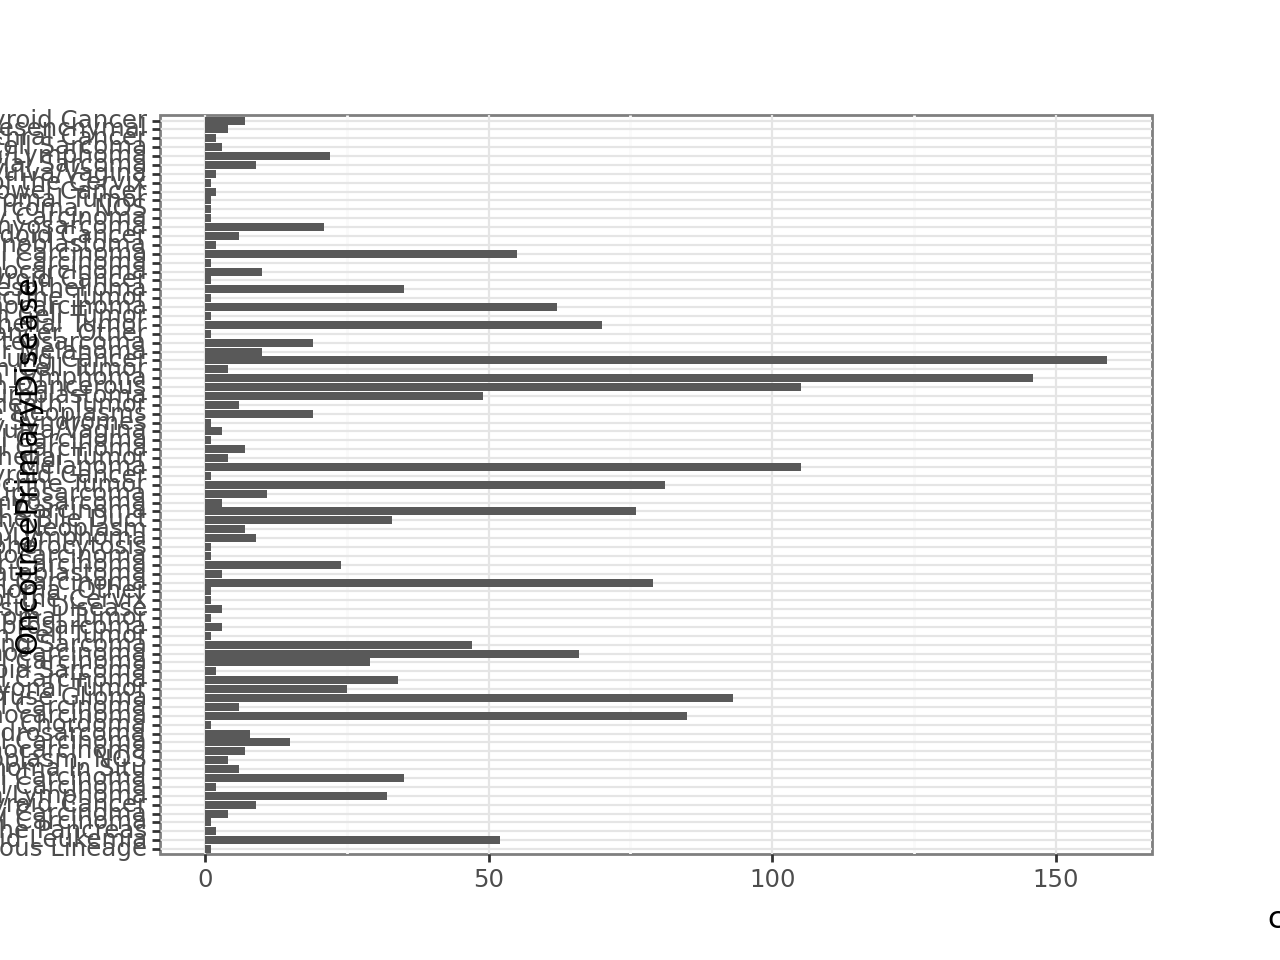

<Figure Size: (640 x 480)>

In [7]:
# Visualize cancer type distribution
cancer_types_bar = (
    gg.ggplot(model_df, gg.aes(x="OncotreePrimaryDisease"))
    + gg.geom_bar()
    + gg.coord_flip()
    + gg.ggtitle("Distribution of cancer types")
    + gg.theme_bw()
)

cancer_types_bar.save(cancer_type_output_figure, dpi=500)

cancer_types_bar

## Visualize age categories and distribution

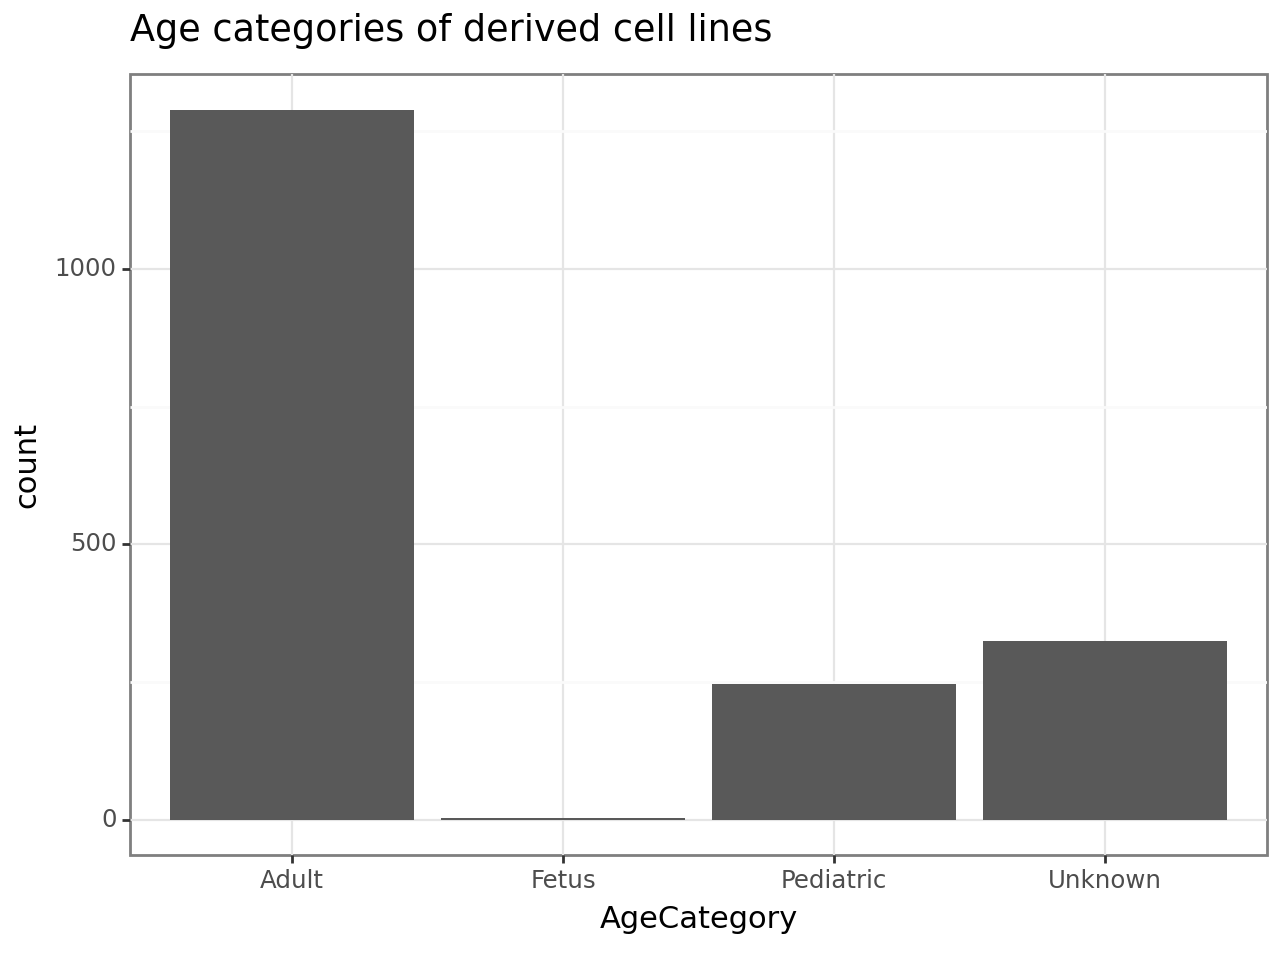

<Figure Size: (640 x 480)>

In [8]:
age_categories_bar = (
    gg.ggplot(model_df, gg.aes(x="AgeCategory"))
    + gg.geom_bar()
    + gg.ggtitle(
        f"Age categories of derived cell lines"
    )
    + gg.theme_bw()
)

age_categories_bar.save(age_category_output_figure, dpi=500)

age_categories_bar

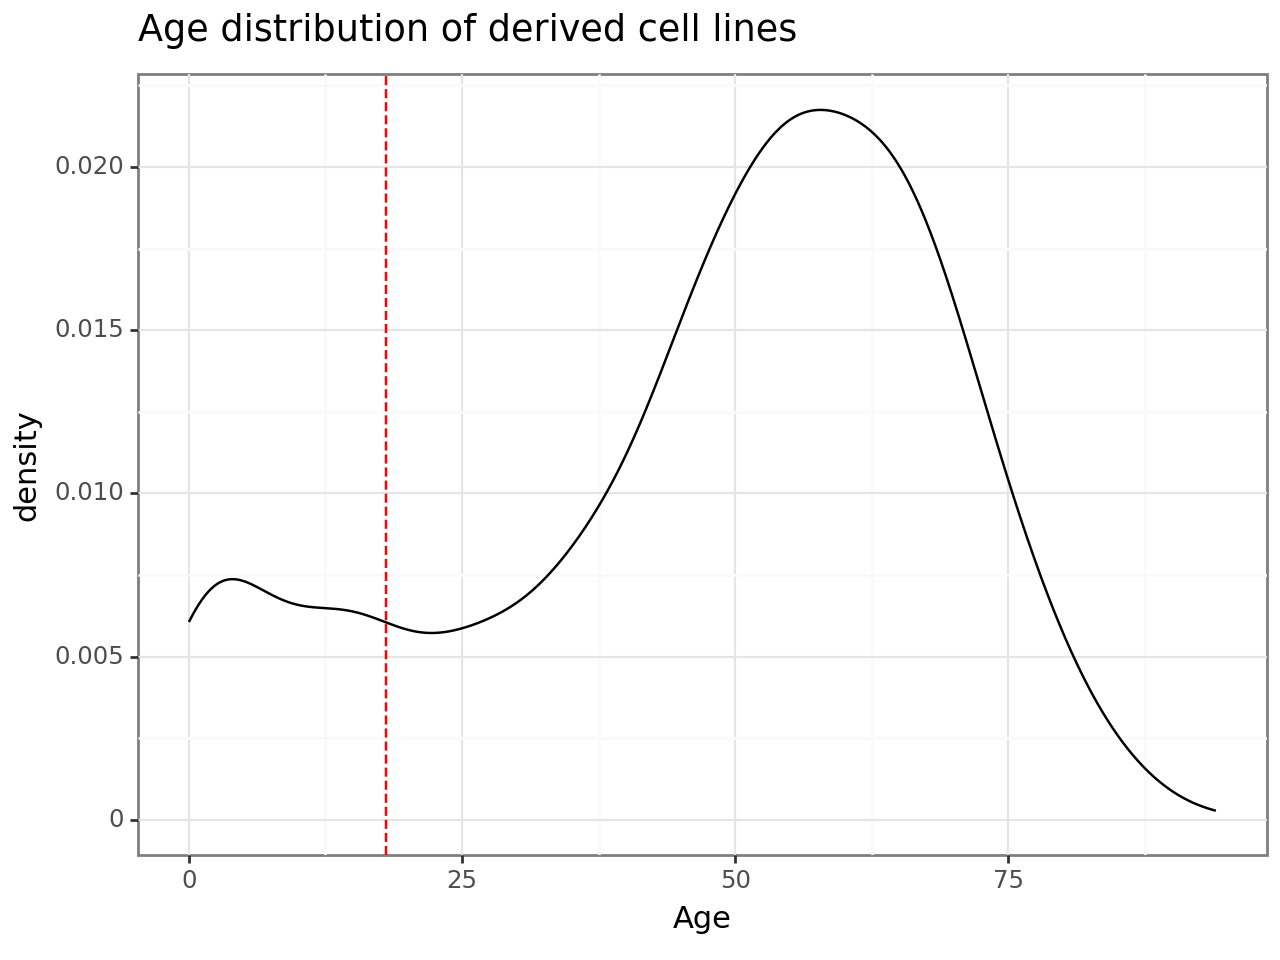

<Figure Size: (640 x 480)>

In [9]:
age_distribution_plot = (
    gg.ggplot(model_df, gg.aes(x="Age"))
    + gg.geom_density()
    + gg.geom_vline(xintercept=adult_threshold, linetype="dashed", color="red")
    + gg.ggtitle(
        f"Age distribution of derived cell lines"
    )
    + gg.theme_bw()
)

age_distribution_plot.save(age_distribution_output_figure, dpi=500)

age_distribution_plot

In [10]:
model_df['AgeCategory'].value_counts()

Adult        1289
Unknown       324
Pediatric     247
Fetus           4
Name: AgeCategory, dtype: int64

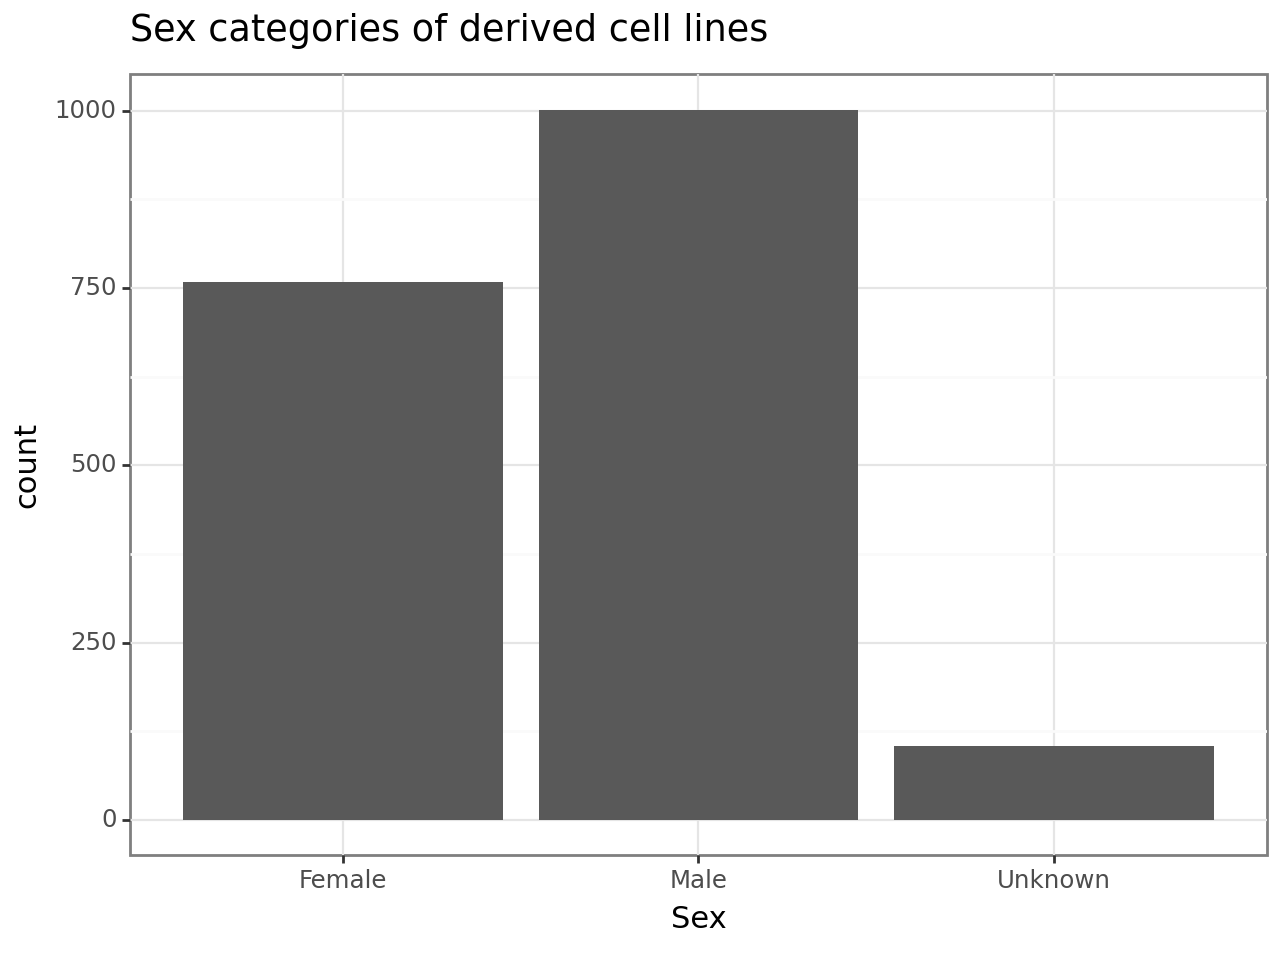

<Figure Size: (640 x 480)>

In [11]:
gendersamp_plot = (
    gg.ggplot(model_df, gg.aes(x="Sex"))
    + gg.geom_bar()
    + gg.ggtitle(f"Sex categories of derived cell lines")
    + gg.theme_bw()
)

gendersamp_plot.save(sex_output_figure)

gendersamp_plot

## What cell lines are pediatric cancer?

In [12]:
pediatric_model_df = (
    model_df.query("AgeCategory == 'Pediatric'")
    .query("ModelID in @sample_overlap")
    .reset_index(drop=True)
)

print(pediatric_model_df.shape)
pediatric_model_df.head(3)

(138, 30)


,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000039,PT-wGDMGe,SK-N-MC,SKNMC,14.0,Commercial,SIDM00634,CVCL_0530,ES,Pediatric,...,NaN,NaN,NaN,NaN,MF-006-001,None,ES,Ewing Sarcoma,Ewing Sarcoma,Bone
1,ACH-000045,PT-zb7Sx0,MV4-11,MV411,10.0,Commercial,SIDM00657,CVCL_0064,AML,Pediatric,...,NaN,133.0,NaN,NaN,MF-005-001,None,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000052,PT-IAac7b,A-673,A673,15.0,Commercial,SIDM00848,CVCL_0080,ES,Pediatric,...,NaN,660.0,NaN,NaN,MF-002-001,None,ES,Ewing Sarcoma,Ewing Sarcoma,Bone


In [13]:
# What are the neuroblastoma models?
pediatric_model_df.query(
    "OncotreeSubtype == 'Neuroblastoma'"
).StrippedCellLineName

5      MHHNB11
8         SIMA
9       CHP212
11       SKNSH
17       KPNYN
19       KELLY
20       SKNAS
24       IMR32
25      SKNBE2
26       SKNFI
29       SKNDZ
51         NB1
76      SHSY5Y
88      CHLA15
89     COGN278
90     COGN305
91      NB1643
93      CHP134
94       GIMEN
95        LAN2
96         NGP
97         NMB
103     CHLA90
106         LS
107       NH12
109        TGW
125       NB69
129     BE2M17
130      KPNYS
131       NB10
132       NB13
133       NB17
134        NB5
135        NB7
137      SKNMM
Name: StrippedCellLineName, dtype: object

In [14]:
# What is the distribution of pediatric tumor types
pediatric_cancer_counts = pediatric_model_df.OncotreePrimaryDisease.value_counts()
pediatric_cancer_counts

Neuroblastoma                                                                                          35
Embryonal Tumor                                                                                        19
Ewing Sarcoma                                                                                          14
Rhabdomyosarcoma                                                                                       12
Osteosarcoma                                                                                           11
B-Lymphoblastic Leukemia/Lymphoma                                                                      10
Non-Hodgkin Lymphoma                                                                                    9
Acute Myeloid Leukemia                                                                                  7
Synovial Sarcoma                                                                                        3
T-Lymphoblastic Leukemia/Lymphoma             

In [15]:
pediatric_cancer_counts.reset_index()

,index,OncotreePrimaryDisease
0,Neuroblastoma,35
1,Embryonal Tumor,19
2,Ewing Sarcoma,14
3,Rhabdomyosarcoma,12
4,Osteosarcoma,11
5,B-Lymphoblastic Leukemia/Lymphoma,10
6,Non-Hodgkin Lymphoma,9
7,Acute Myeloid Leukemia,7
8,Synovial Sarcoma,3
9,T-Lymphoblastic Leukemia/Lymphoma,3


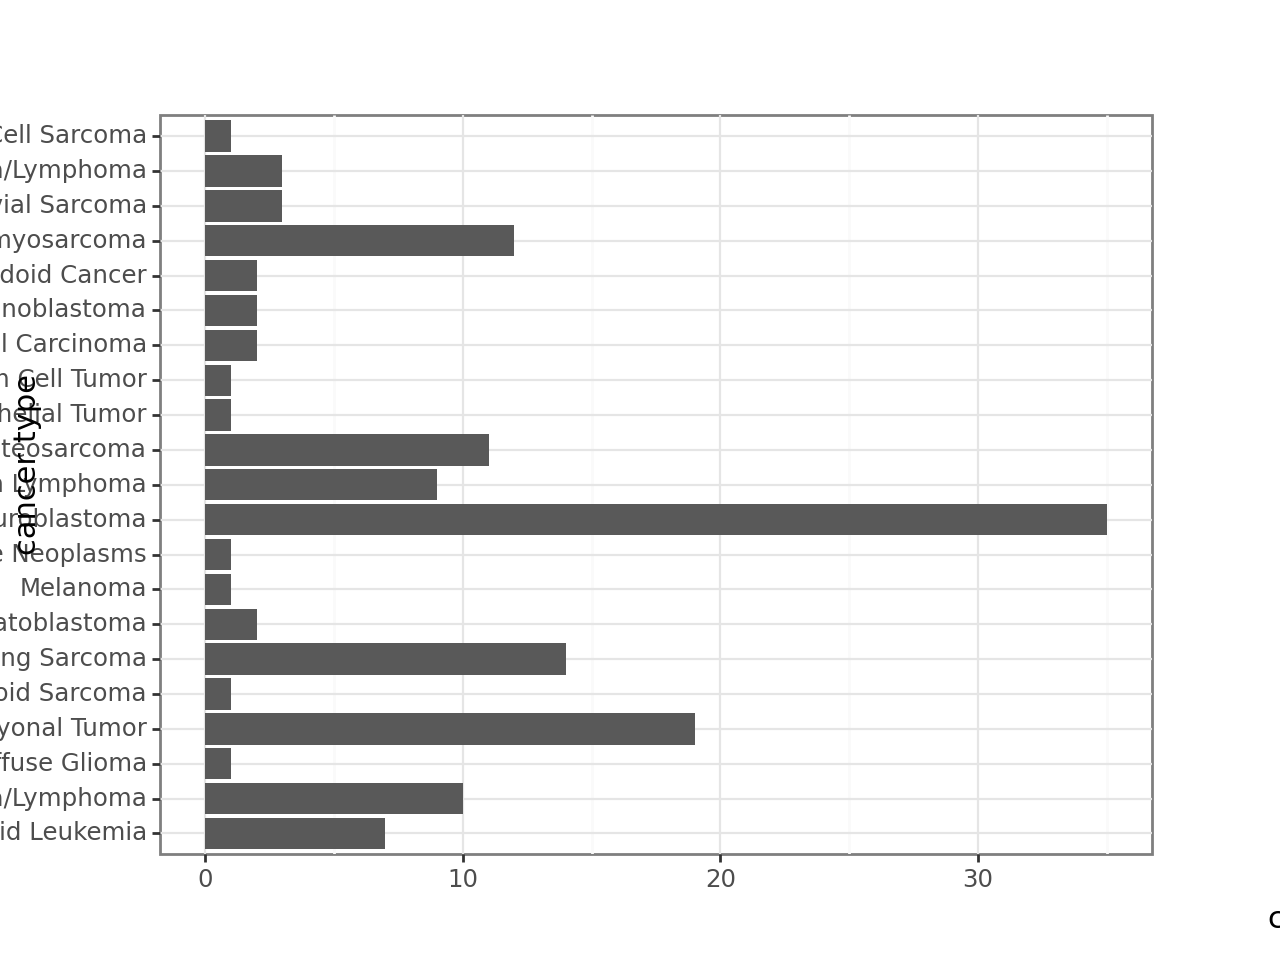

<Figure Size: (640 x 480)>

In [16]:
# Visualize pediatric cancer type distribution
ped_cancer_types_bar = (
    gg.ggplot(
        pediatric_cancer_counts.reset_index(), gg.aes(x="index", y="OncotreePrimaryDisease")
    )
    + gg.geom_bar(stat="identity")
    + gg.coord_flip()
    + gg.ggtitle("Distribution of pediatric cancer types")
    + gg.ylab("count")
    + gg.xlab("cancer type")
    + gg.theme_bw()
)

ped_cancer_types_bar.save(pediatric_cancer_type_output_figure, dpi=500)

ped_cancer_types_bar

In [17]:
# Pediatric solid vs liquid tumors
cancer_types = pediatric_model_df['OncotreePrimaryDisease'].tolist()

ped_liquid = []
ped_non_liquid = []

for cancer_type in cancer_types:
    if liquid_tumors[0] in cancer_type or liquid_tumors[1] in cancer_type:
        ped_liquid.append(cancer_type)
    else:
        ped_non_liquid.append(cancer_type)

print("The number of pediatric solid tumors:")
print(len(ped_non_liquid))

print("The number of pediatric liquid tumors:")
print(len(ped_liquid))

The number of pediatric solid tumors:
109
The number of pediatric liquid tumors:
29


## What cell lines are adult cancer?

In [18]:
adult_model_df = (
    model_df.query("AgeCategory == 'Adult'")
    .query("ModelID in @sample_overlap")
    .reset_index(drop=True)
)

print(adult_model_df.shape)
adult_model_df.head(3)

(774, 30)


,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adult,...,NaN,2201.0,NaN,NaN,MF-001-041,None,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Adult,...,NaN,783.0,NaN,Post-treatment,MF-001-001,None,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Adult,...,NaN,NaN,NaN,NaN,MF-001-001,None,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid


In [19]:
# What is the distribution of adult tumor types
adult_cancer_counts = adult_model_df.OncotreePrimaryDisease.value_counts()
adult_cancer_counts

Non-Small Cell Lung Cancer               79
Diffuse Glioma                           60
Head and Neck Squamous Cell Carcinoma    58
Colorectal Adenocarcinoma                49
Melanoma                                 48
                                         ..
Sarcoma, NOS                              1
Myelodysplastic Syndromes                 1
Poorly Differentiated Thyroid Cancer      1
Fibrosarcoma                              1
Head and Neck Carcinoma, Other            1
Name: OncotreePrimaryDisease, Length: 61, dtype: int64

In [20]:
adult_cancer_counts.reset_index()

,index,OncotreePrimaryDisease
0,Non-Small Cell Lung Cancer,79
1,Diffuse Glioma,60
2,Head and Neck Squamous Cell Carcinoma,58
3,Colorectal Adenocarcinoma,49
4,Melanoma,48
...,...,...
56,"Sarcoma, NOS",1
57,Myelodysplastic Syndromes,1
58,Poorly Differentiated Thyroid Cancer,1
59,Fibrosarcoma,1


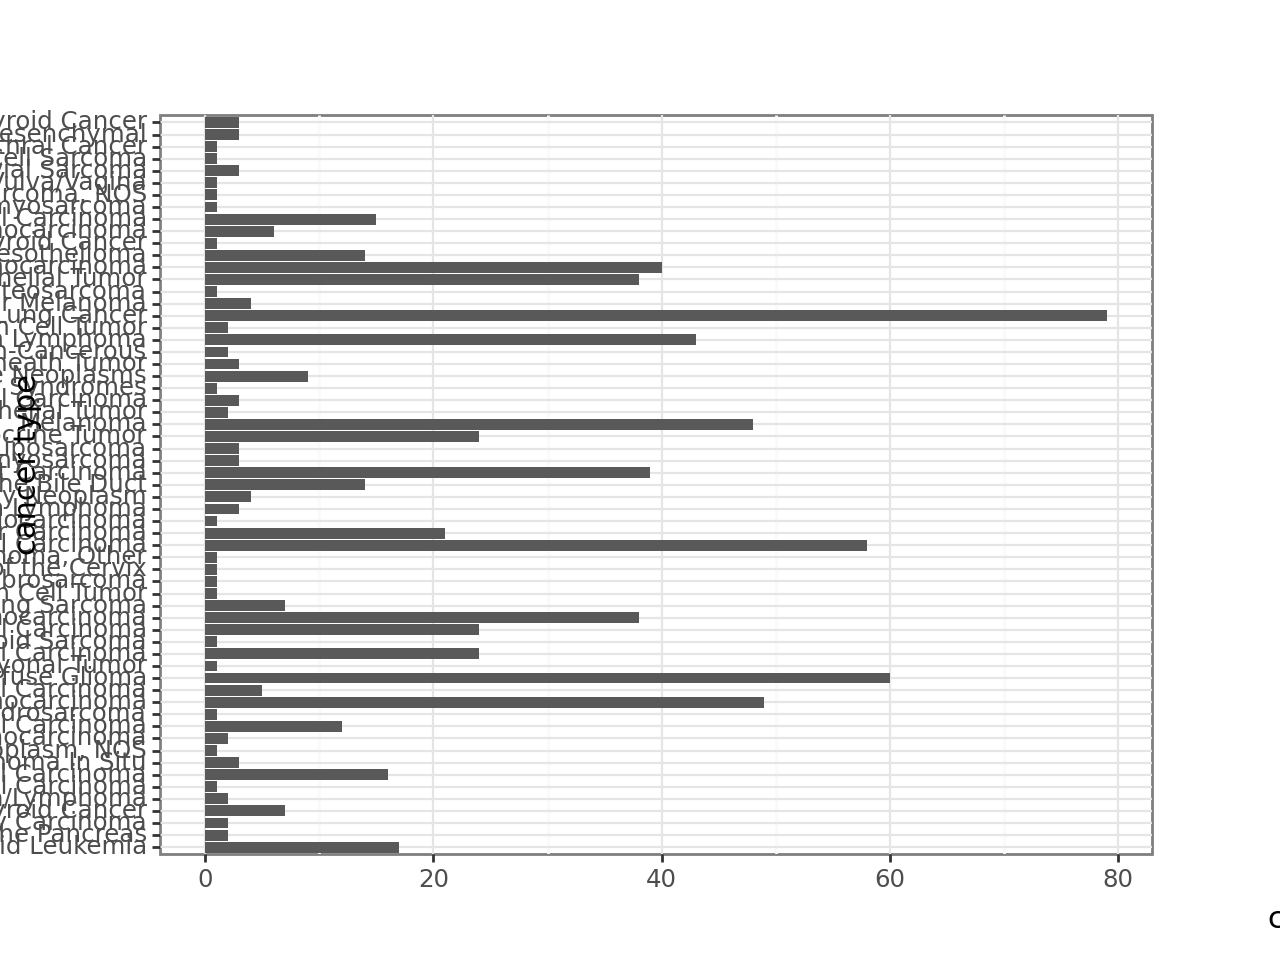

<Figure Size: (640 x 480)>

In [21]:
# Visualize adult cancer type distribution
adult_cancer_types_bar = (
    gg.ggplot(
        adult_cancer_counts.reset_index(), gg.aes(x="index", y="OncotreePrimaryDisease")
    )
    + gg.geom_bar(stat="identity")
    + gg.coord_flip()
    + gg.ggtitle("Distribution of adult cancer types")
    + gg.ylab("count")
    + gg.xlab("cancer type")
    + gg.theme_bw()
)

adult_cancer_types_bar.save(adult_cancer_type_output_figure, dpi=500)

adult_cancer_types_bar

In [22]:
# Adult solid vs liquid tumors
cancer_types = adult_model_df['OncotreePrimaryDisease'].tolist()

adult_liquid = []
adult_non_liquid = []

for cancer_type in cancer_types:
    if liquid_tumors[0] in cancer_type or liquid_tumors[1] in cancer_type:
        adult_liquid.append(cancer_type)
    else:
        adult_non_liquid.append(cancer_type)

print("The number of adult solid tumors:")
print(len(adult_non_liquid))

print("The number of adult liquid tumors:")
print(len(adult_liquid))

The number of adult solid tumors:
709
The number of adult liquid tumors:
65
